# Model Training

In [1]:
import pandas as pd
import numpy as np
import os

## Data Ingestion

In [2]:
train_data = pd.read_csv(os.path.join("data", "adult_train.csv"), index_col = 0)     # index_col = 0 to drop unamed index column
test_data = pd.read_csv(os.path.join("data", "adult_test.csv"), index_col = 0)

In [3]:
train_data.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [4]:
train_data.index               # making sure age is not the index

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       32551, 32552, 32553, 32554, 32555, 32556, 32557, 32558, 32559, 32560],
      dtype='int64', length=32561)

In [5]:
test_data.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


# Prepaing the data for training

- **fnlwght** is the sampling weight and is not related to the target variable **income** and can be removed
- drop **education** as it is just a string representation of column **education-num**
- label encode **sex** and target feature **income** to 0 and 1


In [6]:
train_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
# Drop columns not necessary

cols_to_drop = ['fnlwgt', 'education']

train_data = train_data.drop(labels=cols_to_drop, axis=1)
test_data = test_data.drop(labels=cols_to_drop, axis=1)

In [8]:
train_data.head(2)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [9]:
test_data.head(2)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


In [10]:
# test_data["income"] has . at the end. Replace . with ""

test_data["income"] = test_data["income"].str.replace(".","")

In [11]:
# Define which columns should be label encoded, one hot encoded and which should be scaled

target_col = ["income"]

numerical_cols = [col for col in train_data.select_dtypes(exclude="object").columns if col != "income"]
ohe_cols = [col for col in train_data.select_dtypes(include="object").columns if col not in target_col]


In [12]:
print("numerical_cols : ", numerical_cols)
#print("label_encode_cols : ", label_encode_cols)
print("ohe_cols : ", ohe_cols)

numerical_cols :  ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
ohe_cols :  ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


In [13]:
# Feature Engineering

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

## Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [14]:
## Numerical Pipeline

num_pipeline = Pipeline(
    steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ( "scaler", StandardScaler())

    ]
)



## Ohe Pipeline

ohe_pipeline = Pipeline(
    steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehotencoder", OneHotEncoder(sparse_output=False)),
    ("scaler", StandardScaler())   
    
    ]
)


# Combine all
preprocessor = ColumnTransformer([
("num_pipeline", num_pipeline, numerical_cols),
("ohe_pipeline", ohe_pipeline, ohe_cols)
])

In [15]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'education-num', 'capital-gain',
                                  'capital-loss', 'hours-per-week']),
                                ('ohe_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False)),
                                                 ('scaler', StandardScaler())]),
                                 ['workclass', 'marital-status', 'occupation',
                                  'relationship', 'race', 'sex',
                                  'native-country'])])

In [16]:
# Train test split
## Independent and dependent features - for both train and test data

X_train = train_data.drop(columns=["income"], axis=1)
y_train = train_data["income"]
X_test = test_data.drop(columns=["income"], axis=1)
y_test = test_data["income"]

In [17]:
# Mapping "income" target feature with 0 and 1 -----> Label encoding
print(y_train.unique())
print(y_test.unique())
y_train = y_train.map({' <=50K' : 0, ' >50K':1})
y_test = y_test.map({' <=50K' : 0, ' >50K':1})
print("After Mapping")
print(y_train.unique())
print(y_test.unique())

[' <=50K' ' >50K']
[' <=50K' ' >50K']
After Mapping
[0 1]
[0 1]


In [20]:
y_test

0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: income, Length: 16276, dtype: int64

In [24]:
test = pd.DataFrame(y_test)
len(test[test["income"] == 0])

12430

In [129]:
preprocessor.fit_transform(X_train)

array([[ 0.03067056,  1.13473876,  0.1484529 , ...,  0.30720846,
        -0.04540836, -0.02217266],
       [ 0.83710898,  1.13473876, -0.14592048, ...,  0.30720846,
        -0.04540836, -0.02217266],
       [-0.04264203, -0.42005962, -0.14592048, ...,  0.30720846,
        -0.04540836, -0.02217266],
       ...,
       [ 1.42360965, -0.42005962, -0.14592048, ...,  0.30720846,
        -0.04540836, -0.02217266],
       [-1.21564337, -0.42005962, -0.14592048, ...,  0.30720846,
        -0.04540836, -0.02217266],
       [ 0.98373415, -0.42005962,  1.88842434, ...,  0.30720846,
        -0.04540836, -0.02217266]])

In [130]:
preprocessor.get_feature_names_out()

array(['num_pipeline__age', 'num_pipeline__education-num',
       'num_pipeline__capital-gain', 'num_pipeline__capital-loss',
       'num_pipeline__hours-per-week',
       'ohe_pipeline__workclass_ Federal-gov',
       'ohe_pipeline__workclass_ Local-gov',
       'ohe_pipeline__workclass_ Never-worked',
       'ohe_pipeline__workclass_ Private',
       'ohe_pipeline__workclass_ Self-emp-inc',
       'ohe_pipeline__workclass_ Self-emp-not-inc',
       'ohe_pipeline__workclass_ State-gov',
       'ohe_pipeline__workclass_ Without-pay',
       'ohe_pipeline__marital-status_ Divorced',
       'ohe_pipeline__marital-status_ Married-AF-spouse',
       'ohe_pipeline__marital-status_ Married-civ-spouse',
       'ohe_pipeline__marital-status_ Married-spouse-absent',
       'ohe_pipeline__marital-status_ Never-married',
       'ohe_pipeline__marital-status_ Separated',
       'ohe_pipeline__marital-status_ Widowed',
       'ohe_pipeline__occupation_ Adm-clerical',
       'ohe_pipeline__occupatio

In [131]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test), columns=preprocessor.get_feature_names_out())

In [133]:
## Model Training

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
regressor = LogisticRegression()

In [135]:
# Hyper parameter tuning

from sklearn.model_selection import GridSearchCV

parameters = {'C' : [0.5,1,2,3,5,6,7,9,10,30,45],
              'penalty' : ['l1', 'l2', 'elasticnet', None],
              "solver" : ['liblinear','newton-cholesky']}

log_regressor = GridSearchCV(regressor, param_grid=parameters, scoring="accuracy", cv=5)
log_regressor.fit(X_train,y_train)

d:\FSDS_Projects\MLProjects\CencusIncome\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
d:\FSDS_Projects\MLProjects\CencusIncome\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
d:\FSDS_Projects\MLProjects\CencusIncome\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
d:\FSDS_Projects\MLProjects\CencusIncome\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
d:\FSDS_Projects\MLProjects\CencusIncome\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
d:\FSDS_Project

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 2, 3, 5, 6, 7, 9, 10, 30, 45],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['liblinear', 'newton-cholesky']},
             scoring='accuracy')

In [136]:
log_regressor.best_params_

{'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}

In [137]:
log_regressor.best_score_

0.8507725099790967

In [139]:
# Prediction
y_pred = log_regressor.predict(X_test)

In [140]:
# Performance evaluation
print(accuracy_score(y_test,y_pred))               # 85% accuracy

0.852113541410666


In [141]:
confusion_matrix(y_test,y_pred)

array([[11579,   851],
       [ 1556,  2290]], dtype=int64)

In [25]:
cm = np.array([[11579,   851],
       [ 1556,  2290]])                                      # Executing this to avoid running the model training again

In [26]:
cm

array([[11579,   851],
       [ 1556,  2290]])

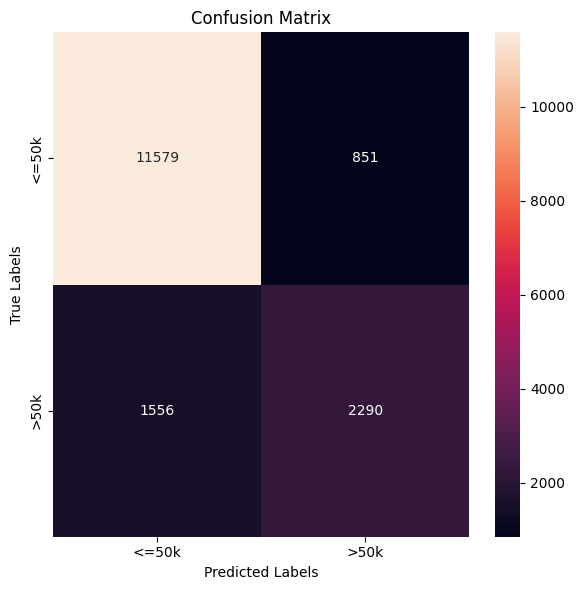

In [30]:
# True Positive Rate - Out of all actual +ve target class how many were predicted correctly
# Positive target class here from above matrix is income <=50k

#plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)                 #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["<=50k", ">50k"])
ax.yaxis.set_ticklabels(["<=50k", ">50k"])
plt.tight_layout()


In [31]:
# TPR or Recall 
TP = 11579
FN = 851
FP = 1156
TN = 2290
tpr =  (TP/(TP+FN))
print(tpr)

# TPR Meaning : Model correctly predicted 93% of all income <=50k

0.9315366049879324


In [32]:
# FPR : out of all the -ve target class how many were incorrectly predicted 

fpr = (FP/(FP+TN))
print(fpr)

# Model only incorrectly predicted 33% of all income >50k or Model falsely flagged 33% of individuals with income >50k

0.3354614045269878


In [142]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score
f1_score(y_test, y_pred)

0.6555030771432662

In [143]:
roc_auc_score(y_test, y_pred)

0.7634802109703053

# Learning

In [72]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown= "ignore", drop="first")
ohe.fit_transform(X_train[["sex"]])

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]])

In [75]:
ohe.inverse_transform(ohe.fit_transform(X_train[["sex"]]))

array([[' Male'],
       [' Male'],
       [' Male'],
       ...,
       [' Female'],
       [' Male'],
       [' Female']], dtype=object)

In [76]:
X_train["sex"]

0           Male
1           Male
2           Male
3           Male
4         Female
          ...   
32556     Female
32557       Male
32558     Female
32559       Male
32560     Female
Name: sex, Length: 32561, dtype: object